# HW2
Importance Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## (a)
Estimating $E[cos(\eta/5) e^{-\eta/5}]$ using uniform samples in $[0,1]$.

In [76]:
num_samples = 10**3
uniform_samples = np.random.uniform(0,1,num_samples)
print("num_samples",num_samples)

def f_a(x):
    return np.cos(x/5)*np.exp(-5*x)

integral_uniform_samples = np.mean(f_a(uniform_samples))
print("Integral using uniform samples:",integral_uniform_samples)

std_dev = np.std(f_a(uniform_samples))
print("Standard deviation:", std_dev)

mc_error = std_dev/np.sqrt(num_samples)
print("MC error as std-dev/$\sqrt{N}$",mc_error)

num_samples 1000
Integral using uniform samples: 0.20906589990813537
Standard deviation: 0.25419122670484456
MC error as std-dev/$\sqrt{N}$ 0.00803823237619526


In [77]:
# exact result
exact = (1/626)*(125 - 125*np.exp(-5)*np.cos(1/5)+5*np.exp(-5)*np.sin(1/5))
print("Exact result:", exact)

exact_err = np.abs(integral_uniform_samples - exact)/exact
print("Relative error from exact result (%)",exact_err*100)

Exact result: 0.19837258551912546
Relative error from exact result (%) 5.390520248060665


In [79]:
# I will run the sampling for fixed number of runs to estimate the number of samples required
n_runs = 100
num_sample_vec = np.logspace(3,7,100)

# error as a function of number of samples
avg_err_vec = []

for num_samples in num_sample_vec:
    # error as a function of runs, for a fixed number of samples
    error_vec = []
    for i in range(n_runs):
        uniform_samples = np.random.uniform(0,1,int(num_samples))
        integral_uniform_samples = np.mean(f_a(uniform_samples))
        exact_err = np.abs(integral_uniform_samples - exact)/exact
        error_vec.append(exact_err)

    avg_exact_err = np.mean(error_vec)
    avg_err_vec.append(avg_exact_err)


Text(0.5,0,'Number of samples')

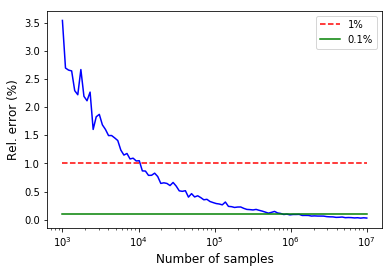

In [80]:
plt.semilogx(num_sample_vec,np.array(avg_err_vec)*100,'b')
plt.semilogx(num_sample_vec,[1]*len(num_sample_vec),'r--',label="1%")
plt.semilogx(num_sample_vec,[0.1]*len(num_sample_vec),'g',label="0.1%")
plt.legend()
plt.ylabel("Rel. error (%)",fontsize=12)
plt.xlabel("Number of samples",fontsize=12)

From the above plot, we see that $10^4$ samples are needed for 1% error and $10^6$ samples are needed for 0.1 % error.

## (b)
We can determine the normalization constant analytically. $I_1 = \int_0^1 e^{-5x} dx = \frac{1 - e^{-5}}{5}$.
$$ y = F(x) = \frac{1}{I_1} \int_0^x e^{-5x} dx = \frac{1 - e^{-5x}}{5I_1} $$ 

Then, $x = \frac{-1}{5} \log(1 - 5I_1y)$. We can sample $x \sim \frac{e^{-5x}}{I_1}$ by uniformly sampling $y$ in $[0,1]$

In [75]:
num_samples = 10**2
uniform_samples = np.random.uniform(0,1,num_samples)
print("num_samples",num_samples)
I_1 = 0.2*(1 - np.exp(-5))

def func_x(y):
    return -0.2 * np.log(1- 5*I_1*y)

samples_x = func_x(uniform_samples)

def f_b(x):
    return np.cos(x/5)
integral_samples_x = I_1*np.mean(f_b(samples_x))

print("Integral using importance sampling",integral_samples_x)

std_dev = np.std(f_b(samples_x))
print("Standard deviation:", std_dev)

exact_err = np.abs(integral_samples_x - exact)/exact
print("Relative error from exact result (%)",exact_err*100)

num_samples 100
Integral using importance sampling 0.19839304855733253
Standard deviation: 0.002552426203408489
Relative error from exact result (%) 0.010315456721766555


In [71]:
# I will run the sampling for fixed number of runs to estimate the number of samples required
n_runs = 100
num_sample_vec = np.logspace(0,5,100)

# error as a function of number of samples
avg_err_vec = []

for num_samples in num_sample_vec:
    # error as a function of runs, for a fixed number of samples
    error_vec = []
    for i in range(n_runs):
        uniform_samples = np.random.uniform(0,1,int(num_samples))
        samples_x = func_x(uniform_samples)
        integral_samples_x = I_1*np.mean(f_b(samples_x))
        exact_err = np.abs(integral_samples_x - exact)/exact
        error_vec.append(exact_err)

    avg_exact_err = np.mean(error_vec)
    avg_err_vec.append(avg_exact_err)

Text(0.5,0,'Number of samples')

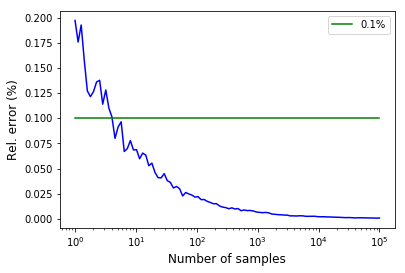

In [72]:
plt.semilogx(num_sample_vec,np.array(avg_err_vec)*100,'b')
#plt.semilogx(num_sample_vec,[1]*len(num_sample_vec),'r',label="1%")
plt.semilogx(num_sample_vec,[0.1]*len(num_sample_vec),'g',label="0.1%")
plt.legend()
plt.ylabel("Rel. error (%)",fontsize=12)
plt.xlabel("Number of samples",fontsize=12)

With importance sampling, the relative error is less than 0.1 % even with just 10 samples. It is always less than 1% for even one sample with very high probability.